In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from copy import deepcopy

In [2]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/uber.csv')

In [5]:
df.shape

(200000, 9)

In [6]:
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [7]:
df.describe(include = 'all')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.drop('key', axis = 1, inplace = True)

In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df[df['dropoff_longitude'].isna()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [12]:
df = df.dropna()

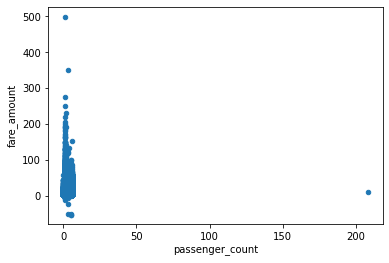

In [13]:
df.plot(kind = 'scatter', x = 'passenger_count', y = 'fare_amount')

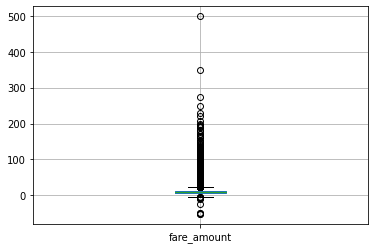

In [14]:
df.boxplot('fare_amount')

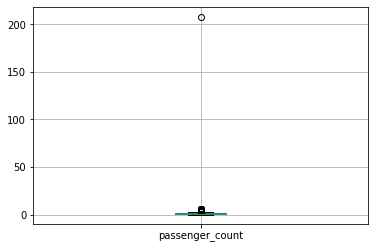

In [15]:
df.boxplot('passenger_count')

In [16]:
df[(df['passenger_count'] > 10)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [17]:
df[(df['fare_amount'] < 0) | (df['fare_amount'] > 200)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4292,350.00,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.000000,3
23682,206.38,2014-11-02 22:40:20 UTC,-73.782161,40.644601,-74.449079,40.836457,1
29261,220.00,2013-09-27 12:36:11 UTC,-73.801147,40.671653,-73.790402,40.646742,1
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
71715,250.00,2013-05-11 00:31:00 UTC,0.000000,0.000000,0.000000,0.000000,1
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5


In [18]:
df.drop(df.index[df['fare_amount'] <= 0], axis = 0, inplace = True)
df.drop(df.index[df['passenger_count'] > 10], axis = 0, inplace = True)

In [19]:
df[df['passenger_count'] == 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,10.1,2011-08-05 07:03:08 UTC,-74.013900,40.707800,-73.992300,40.749300,0
908,11.7,2011-09-06 12:25:19 UTC,-73.981000,40.764600,-73.962900,40.778400,0
926,3.3,2012-03-26 18:11:24 UTC,-73.979978,40.765821,-73.983894,40.766873,0
2000,15.7,2012-04-20 15:07:57 UTC,-73.975285,40.750138,-73.974729,40.783151,0
3011,6.1,2012-01-07 19:19:08 UTC,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...
196797,3.3,2011-01-17 15:52:26 UTC,-74.000760,40.757637,-74.004852,40.751947,0
197103,7.3,2011-12-10 15:33:12 UTC,0.000000,0.000000,0.000000,0.000000,0
198872,5.7,2011-09-20 19:55:05 UTC,-73.980300,40.742800,-73.967900,40.755600,0
198902,12.1,2011-08-22 21:10:56 UTC,-73.996700,40.737200,-74.008500,40.704000,0


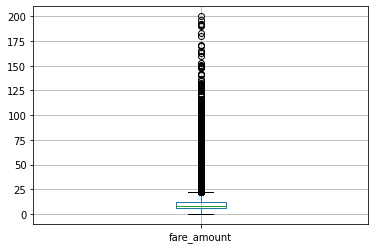

In [20]:
df[(df['fare_amount'] <= 200) & (df['fare_amount'] > 0)].boxplot('fare_amount')

In [21]:
df[(df['pickup_latitude'] == 0.0) | (df['pickup_longitude'] == 0.0) | (df['dropoff_latitude'] == 0.0) | (df['dropoff_longitude'] == 0.0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7,2.5,2012-12-11 13:52:00 UTC,0.0,0.0,0.0,0.0,1
11,8.5,2011-05-23 22:15:00 UTC,0.0,0.0,0.0,0.0,1
65,6.0,2014-05-05 19:27:00 UTC,0.0,0.0,0.0,0.0,1
92,6.1,2011-12-02 14:07:00 UTC,0.0,0.0,0.0,0.0,1
120,6.5,2010-08-20 19:39:48 UTC,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...
199718,4.9,2011-08-19 07:16:00 UTC,0.0,0.0,0.0,0.0,1
199724,7.5,2013-10-11 11:25:41 UTC,0.0,0.0,0.0,0.0,1
199880,6.5,2014-02-22 06:45:46 UTC,0.0,0.0,0.0,0.0,1
199883,12.5,2012-09-10 17:39:00 UTC,0.0,0.0,0.0,0.0,2


In [22]:
df.drop(df.index[(df['pickup_latitude'] == 0.0) | (df['pickup_longitude'] == 0.0) | (df['dropoff_latitude'] == 0.0) | (df['dropoff_longitude'] == 0.0)], inplace = True)

In [23]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [24]:
df.reset_index(drop = True, inplace = True)

In [25]:
df[(df['pickup_latitude'] == 0.0) | (df['pickup_longitude'] == 0.0) | (df['dropoff_latitude'] == 0.0) | (df['dropoff_longitude'] == 0.0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [26]:
df.describe(include = 'all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,196011.000000,196011,196011.000000,196011.000000,196011.000000,196011.000000,196011.000000
unique,NaN,192797,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,11.345316,NaN,-73.930053,40.705587,-73.917104,40.688583,1.684155
std,9.795785,NaN,5.449646,5.427121,8.518645,3.994469,1.307604
min,0.010000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,NaN,-73.992269,40.736395,-73.991592,40.735265,1.000000
50%,8.500000,NaN,-73.982101,40.753287,-73.980521,40.753725,1.000000
75%,12.500000,NaN,-73.968314,40.767542,-73.965316,40.768326,2.000000


In [27]:
df.drop(df.index[(abs(df['pickup_latitude']) >= 90.0) | (abs(df['pickup_longitude']) >= 180.0) | (abs(df['dropoff_latitude']) >= 180.0) | (abs(df['dropoff_longitude']) >= 90.0)], inplace = True)

In [28]:
df.reset_index(drop = True, inplace = True)

In [29]:
df.describe(include = 'all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195999.000000,195999,195999.000000,195999.000000,195999.000000,195999.000000,195999.000000
unique,NaN,192786,NaN,NaN,NaN,NaN,NaN
top,NaN,2009-02-12 12:46:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,11.345271,NaN,-73.903768,40.687324,-73.903227,40.686732,1.684157
std,9.795890,NaN,2.775658,2.647020,2.766257,2.652369,1.307604
min,0.010000,NaN,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,6.000000,NaN,-73.992268,40.736395,-73.991592,40.735266,1.000000
50%,8.500000,NaN,-73.982101,40.753287,-73.980521,40.753725,1.000000
75%,12.500000,NaN,-73.968314,40.767540,-73.965315,40.768326,2.000000


In [30]:
df['distance'] = df.apply(lambda x: distance(x['pickup_latitude'], x['dropoff_latitude'], x['pickup_longitude'], x['dropoff_longitude']), axis = 1)

In [31]:
df.drop(labels = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1, inplace = True)

In [32]:
df

,fare_amount,pickup_datetime,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,5,4.475450
...,...,...,...,...
195994,3.0,2012-10-28 10:49:00 UTC,1,0.112210
195995,7.5,2014-03-14 01:09:00 UTC,1,1.875050
195996,30.9,2009-06-29 00:42:00 UTC,2,12.850319
195997,14.5,2015-05-20 14:56:25 UTC,1,3.539715


In [33]:
df.describe(include = 'all')

,fare_amount,pickup_datetime,passenger_count,distance
count,195999.000000,195999,195999.000000,195999.000000
unique,NaN,192786,NaN,NaN
top,NaN,2009-02-12 12:46:00 UTC,NaN,NaN
freq,NaN,4,NaN,NaN
mean,11.345271,NaN,1.684157,4.471673
std,9.795890,NaN,1.307604,78.978156
min,0.010000,NaN,0.000000,0.000000
25%,6.000000,NaN,1.000000,1.255593
50%,8.500000,NaN,1.000000,2.156634
75%,12.500000,NaN,2.000000,3.910033


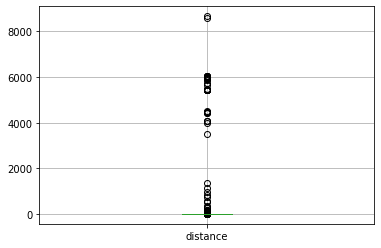

In [34]:
df.boxplot('distance')

In [35]:
df[(df['distance'] > 100) & (df['distance'] < 200)]

,fare_amount,pickup_datetime,passenger_count,distance
19315,10.5,2011-02-14 16:29:32 UTC,1,126.654338
20950,6.1,2010-05-03 11:45:32 UTC,1,101.676953
21659,17.7,2011-02-05 02:20:22 UTC,2,125.275929
24278,27.3,2011-02-17 18:30:35 UTC,1,177.995633
30445,6.1,2011-03-04 19:06:05 UTC,1,128.827836
32108,60.3,2010-06-19 14:32:17 UTC,2,115.073410
36405,17.3,2011-05-28 07:49:41 UTC,1,176.519082
37011,8.9,2011-03-13 18:12:20 UTC,2,127.565412
49280,9.7,2011-04-19 08:22:44 UTC,1,128.337334
52148,19.3,2011-04-15 13:08:53 UTC,1,121.984292


In [36]:
df[(df['distance'] > 50) & (df['distance'] < 100)]

,fare_amount,pickup_datetime,passenger_count,distance
18071,190.00,2012-07-29 08:28:11 UTC,1,60.851156
23228,206.38,2014-11-02 22:40:20 UTC,1,60.100889
32546,20.10,2010-06-09 21:05:49 UTC,1,96.021362
32746,11.30,2009-05-12 12:26:42 UTC,1,94.353875
35630,148.33,2013-06-19 18:27:00 UTC,1,53.066101
44227,170.00,2014-11-10 16:55:00 UTC,1,52.108219
55078,8.10,2009-04-22 19:30:59 UTC,1,94.869531
65929,6.10,2010-06-14 09:07:16 UTC,1,97.382812
76566,21.30,2009-06-26 17:07:03 UTC,2,96.182729
77674,49.57,2009-07-14 10:19:06 UTC,1,98.364525


In [37]:
df[(df['distance'] > 40) & (df['distance'] < 50)]

,fare_amount,pickup_datetime,passenger_count,distance
8901,126.10,2011-06-13 15:46:00 UTC,1,48.706330
22705,126.83,2014-06-11 16:15:00 UTC,1,42.830475
85432,140.25,2013-06-23 18:59:45 UTC,1,42.242033
97989,150.00,2011-06-15 13:14:00 UTC,1,49.003731
103690,165.33,2014-01-03 09:18:40 UTC,1,41.225208
111971,190.83,2015-04-04 23:59:34 UTC,1,46.086169


In [38]:
df.drop(df.index[df['distance'] > 60], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [39]:
df[df['passenger_count'] == 0]

,fare_amount,pickup_datetime,passenger_count,distance
325,10.1,2011-08-05 07:03:08 UTC,0,4.960570
891,11.7,2011-09-06 12:25:19 UTC,0,2.162835
909,3.3,2012-03-26 18:11:24 UTC,0,0.349924
1955,15.7,2012-04-20 15:07:57 UTC,0,3.671177
2952,6.1,2012-01-07 19:19:08 UTC,0,1.791370
...,...,...,...,...
192548,5.7,2011-04-14 18:21:00 UTC,0,1.103446
192765,3.3,2011-01-17 15:52:26 UTC,0,0.720492
194792,5.7,2011-09-20 19:55:05 UTC,0,1.765465
194822,12.1,2011-08-22 21:10:56 UTC,0,3.823264


In [40]:
df.drop(df.index[df['passenger_count'] == 0], axis = 0, inplace = True)

In [41]:
datetime = df['pickup_datetime'].apply(lambda x: x.split())
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['week_day'] = df['pickup_datetime'].dt.day_name()
datetime = np.array(list(datetime))
date = list(datetime[:, 0])
date = np.array([x.split('-') for x in date])
date

array([['2015', '05', '07'],
       ['2009', '07', '17'],
       ['2009', '08', '24'],
       ...,
       ['2009', '06', '29'],
       ['2015', '05', '20'],
       ['2010', '05', '15']], dtype='<U4')

In [42]:
time = list(datetime[:, 1])
time = np.array([x.split(':') for x in time])
time

array([['19', '52', '06'],
       ['20', '04', '56'],
       ['21', '45', '00'],
       ...,
       ['00', '42', '00'],
       ['14', '56', '25'],
       ['04', '08', '00']], dtype='<U2')

In [43]:
df = df.assign(year=date[:,0], month=date[:,1], day=date[:,2], hour=time[:,0], minute=time[:,1])

In [44]:
df[['year', 'month', 'day', 'hour', 'minute']] = df[['year', 'month', 'day', 'hour', 'minute']].astype(int)

In [45]:
df.dtypes

fare_amount                    float64
pickup_datetime    datetime64[ns, UTC]
passenger_count                  int64
distance                       float64
week_day                        object
year                             int64
month                            int64
day                              int64
hour                             int64
minute                           int64
dtype: object

In [46]:
df.drop('pickup_datetime', axis = 1, inplace = True)

In [47]:
df

,fare_amount,passenger_count,distance,week_day,year,month,day,hour,minute
0,7.5,1,1.683323,Thursday,2015,5,7,19,52
1,7.7,1,2.457590,Friday,2009,7,17,20,4
2,12.9,1,5.036377,Monday,2009,8,24,21,45
3,5.3,3,1.661683,Friday,2009,6,26,8,22
4,16.0,5,4.475450,Thursday,2014,8,28,17,47
...,...,...,...,...,...,...,...,...,...
195891,3.0,1,0.112210,Sunday,2012,10,28,10,49
195892,7.5,1,1.875050,Friday,2014,3,14,1,9
195893,30.9,2,12.850319,Monday,2009,6,29,0,42
195894,14.5,1,3.539715,Wednesday,2015,5,20,14,56


In [48]:
df.describe(include = 'all')

,fare_amount,passenger_count,distance,week_day,year,month,day,hour,minute
count,195210.000000,195210.000000,195210.000000,195210,195210.000000,195210.000000,195210.000000,195210.000000,195210.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Friday,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,30156,NaN,NaN,NaN,NaN,NaN
mean,11.349392,1.690103,3.316963,NaN,2011.741238,6.284345,15.705896,13.491404,29.533318
std,9.785473,1.306059,3.597596,NaN,1.861769,3.439518,8.687684,6.515480,17.336330
min,0.010000,1.000000,0.000000,NaN,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,1.255285,NaN,2010.000000,3.000000,8.000000,9.000000,14.000000
50%,8.500000,1.000000,2.156108,NaN,2012.000000,6.000000,16.000000,14.000000,30.000000
75%,12.500000,2.000000,3.906837,NaN,2013.000000,9.000000,23.000000,19.000000,45.000000


In [49]:

df = pd.get_dummies(df, columns = ['week_day'])

In [50]:
df

,fare_amount,passenger_count,distance,year,month,day,hour,minute,week_day_Friday,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
0,7.5,1,1.683323,2015,5,7,19,52,0,0,0,0,1,0,0
1,7.7,1,2.457590,2009,7,17,20,4,1,0,0,0,0,0,0
2,12.9,1,5.036377,2009,8,24,21,45,0,1,0,0,0,0,0
3,5.3,3,1.661683,2009,6,26,8,22,1,0,0,0,0,0,0
4,16.0,5,4.475450,2014,8,28,17,47,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195891,3.0,1,0.112210,2012,10,28,10,49,0,0,0,1,0,0,0
195892,7.5,1,1.875050,2014,3,14,1,9,1,0,0,0,0,0,0
195893,30.9,2,12.850319,2009,6,29,0,42,0,1,0,0,0,0,0
195894,14.5,1,3.539715,2015,5,20,14,56,0,0,0,0,0,0,1


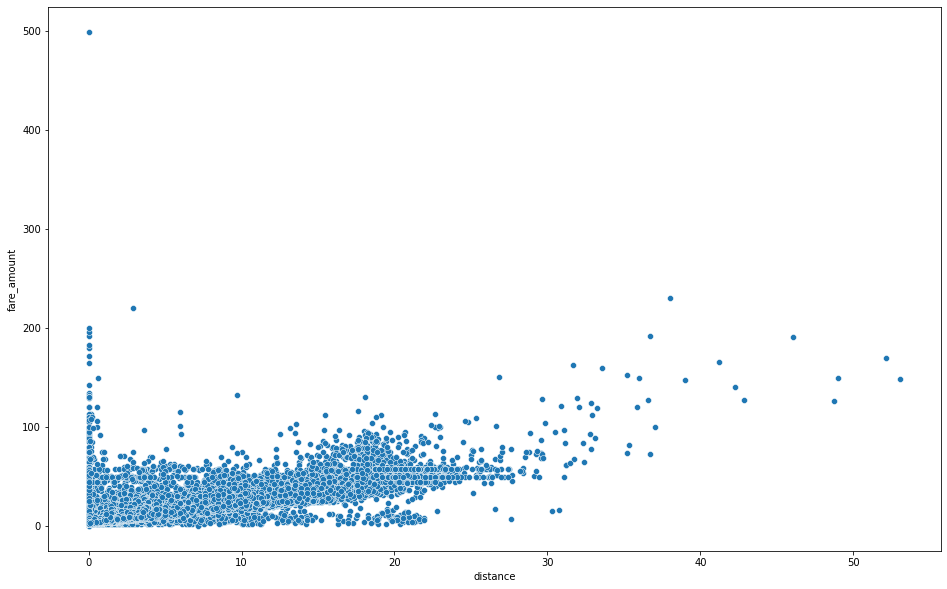

In [51]:
plt.subplots(figsize = (16,10))
sns.scatterplot(data = df, x = 'distance', y = 'fare_amount')

In [52]:
df.drop(df.index[((df['fare_amount'] > 75) & (df['distance'] < 5))], inplace = True)
df.drop(df.index[((df['fare_amount'] < 75) & (df['distance'] > 40))], inplace = True)
df.drop(df.index[df['fare_amount'] > 200], inplace = True)
df.drop(df.index[df['distance'] <= 0.0], inplace = True)

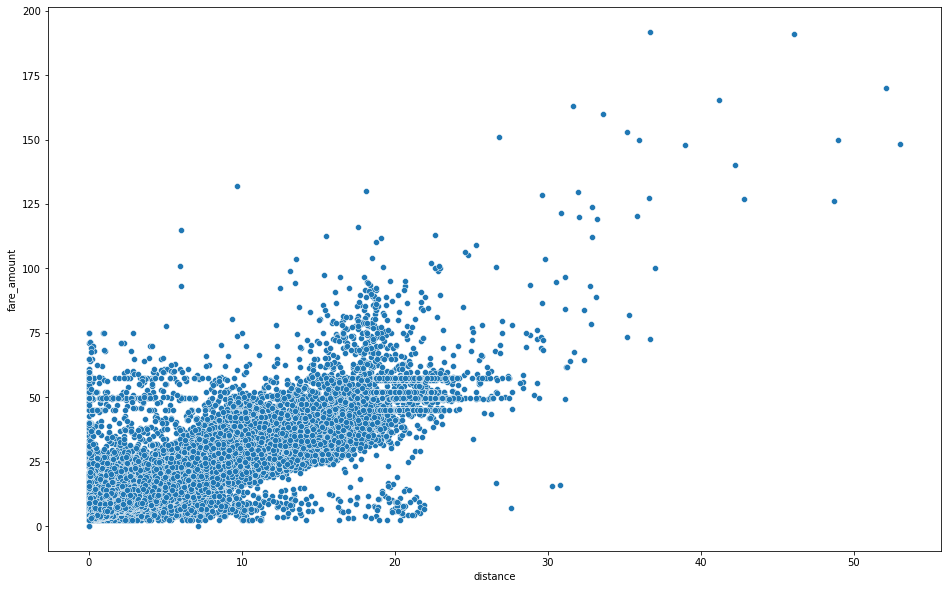

In [53]:
plt.subplots(figsize = (16,10))
sns.scatterplot(data = df, x = 'distance', y = 'fare_amount')

In [54]:
df

,fare_amount,passenger_count,distance,year,month,day,hour,minute,week_day_Friday,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
0,7.5,1,1.683323,2015,5,7,19,52,0,0,0,0,1,0,0
1,7.7,1,2.457590,2009,7,17,20,4,1,0,0,0,0,0,0
2,12.9,1,5.036377,2009,8,24,21,45,0,1,0,0,0,0,0
3,5.3,3,1.661683,2009,6,26,8,22,1,0,0,0,0,0,0
4,16.0,5,4.475450,2014,8,28,17,47,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195891,3.0,1,0.112210,2012,10,28,10,49,0,0,0,1,0,0,0
195892,7.5,1,1.875050,2014,3,14,1,9,1,0,0,0,0,0,0
195893,30.9,2,12.850319,2009,6,29,0,42,0,1,0,0,0,0,0
195894,14.5,1,3.539715,2015,5,20,14,56,0,0,0,0,0,0,1


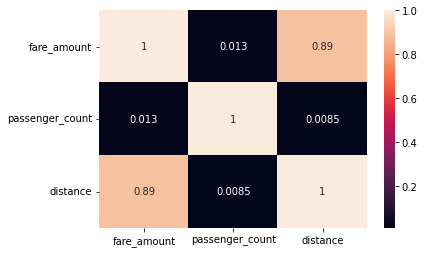

In [55]:
corr_mat = df[['fare_amount', 'passenger_count', 'distance']].corr()
sns.heatmap(corr_mat, annot=True)

In [56]:
df['avg_per_km'] = df['fare_amount'] / df['distance']

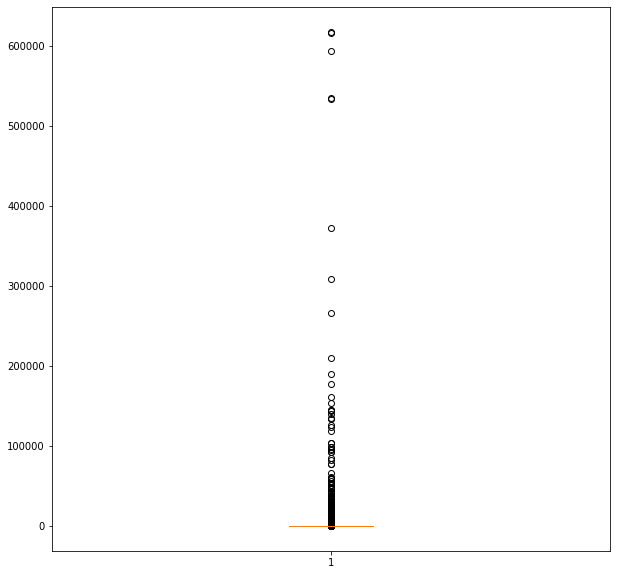

In [57]:
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

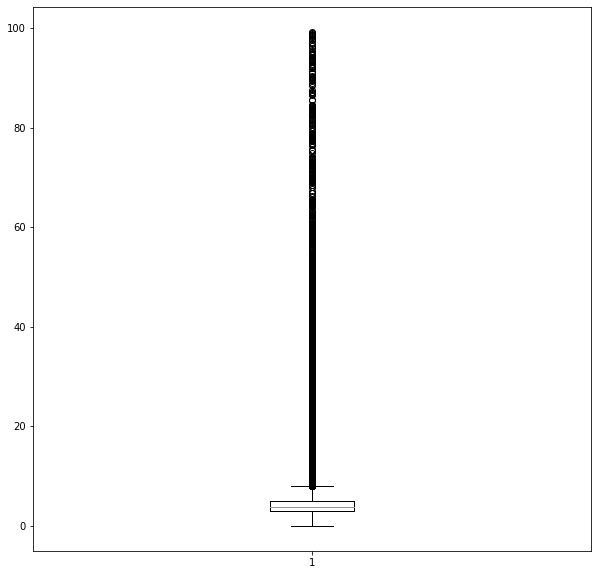

In [58]:
df = df[df['avg_per_km'] < 100]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

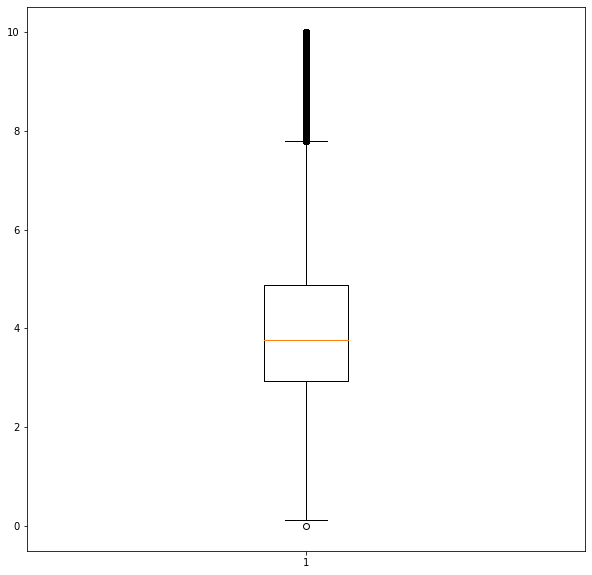

In [59]:
df = df[df['avg_per_km'] < 10]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

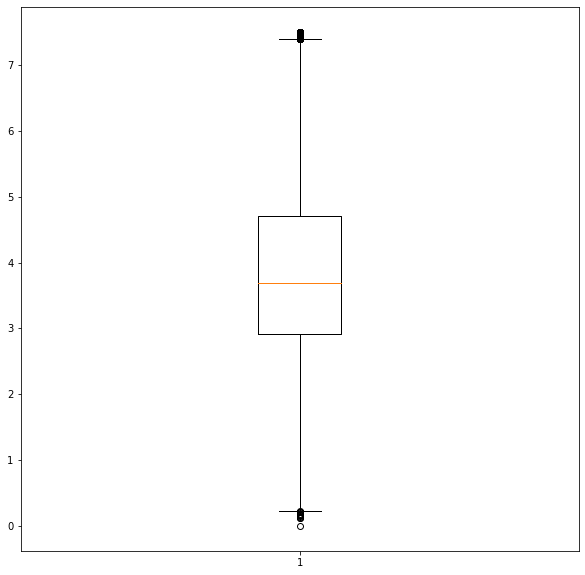

In [60]:
df = df[df['avg_per_km'] < 7.5]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

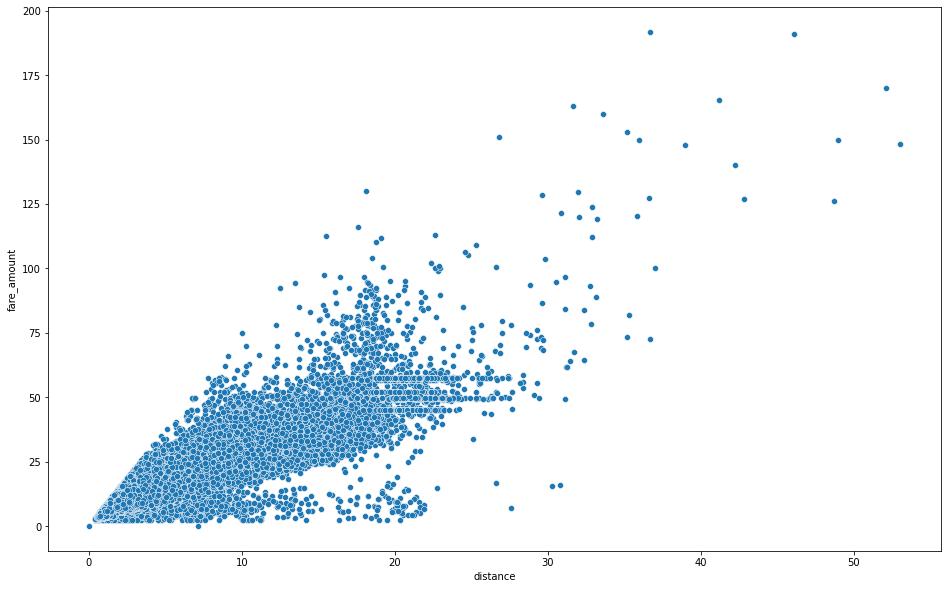

In [61]:
plt.subplots(figsize = (16,10))
sns.scatterplot(data = df, x = 'distance', y = 'fare_amount')

Training model

In [62]:
X = df.iloc[:, ~df.columns.isin(['fare_amount'])]
y = df['fare_amount']

In [63]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [66]:
lr.score(X_test, y_test)

0.9024312868250166

In [67]:
alpha = np.geomspace(0.001, 3, num = 10)
for a in alpha:
  print('alpha = {:.3f}'.format(a), end = ' | ')
  rr = Ridge(alpha = a)
  rr.fit(X_train, y_train)
  y_pred = rr.predict(X_test)
  print('score = ', rr.score(X_test, y_test))

alpha = 0.001 | score =  0.9024310325878289
alpha = 0.002 | score =  0.9024310328229739
alpha = 0.006 | score =  0.9024310333953497
alpha = 0.014 | score =  0.9024310347885872
alpha = 0.035 | score =  0.9024310381798758
alpha = 0.085 | score =  0.9024310464344372
alpha = 0.208 | score =  0.902431066525276
alpha = 0.506 | score =  0.9024311154176163
alpha = 1.232 | score =  0.9024312343593506
alpha = 3.000 | score =  0.9024315234697888


In [68]:
alpha = np.geomspace(0.001, 3, num = 10)
for a in alpha:
  print('alpha = {:.3f}'.format(a), end = ' | ')
  lasso = Lasso(alpha = a)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  print('score = ', lasso.score(X_test, y_test))

alpha = 0.001 | score =  0.9024333009047552
alpha = 0.002 | score =  0.902435989219842
alpha = 0.006 | score =  0.9024396940758213
alpha = 0.014 | score =  0.9024381858710859
alpha = 0.035 | score =  0.902354263105446
alpha = 0.085 | score =  0.9020685429767134
alpha = 0.208 | score =  0.90063726076696
alpha = 0.506 | score =  0.8911629426865102
alpha = 1.232 | score =  0.8432415226532639
alpha = 3.000 | score =  0.7634273530957506
